<a href="https://colab.research.google.com/github/ousabu/aiousama/blob/master/svm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [88]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris

In [89]:
data=load_iris()


In [90]:
df=pd.DataFrame(data.data,columns=data.feature_names)

In [91]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [92]:
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [93]:
df['target']=data.target

In [94]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [95]:
df[df.target==1].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


In [96]:
df[df.target==2].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
100,6.3,3.3,6.0,2.5,2
101,5.8,2.7,5.1,1.9,2
102,7.1,3.0,5.9,2.1,2
103,6.3,2.9,5.6,1.8,2
104,6.5,3.0,5.8,2.2,2


In [97]:
df['flowers_name']=df.target.apply(lambda x: data.target_names[x])
#df['flower_name'] =df.target.apply(lambda x: data.target_names[x])

In [98]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flowers_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [99]:
df[45:55]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flowers_name
45,4.8,3.0,1.4,0.3,0,setosa
46,5.1,3.8,1.6,0.2,0,setosa
47,4.6,3.2,1.4,0.2,0,setosa
48,5.3,3.7,1.5,0.2,0,setosa
49,5.0,3.3,1.4,0.2,0,setosa
50,7.0,3.2,4.7,1.4,1,versicolor
51,6.4,3.2,4.5,1.5,1,versicolor
52,6.9,3.1,4.9,1.5,1,versicolor
53,5.5,2.3,4.0,1.3,1,versicolor
54,6.5,2.8,4.6,1.5,1,versicolor


In [100]:
df0=df[:50]

In [101]:
df1=df[50:100]

In [102]:
df2=df[100:]

In [103]:
import matplotlib.pyplot as plt


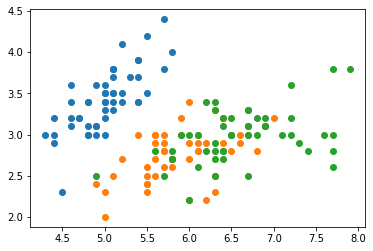

In [104]:
plt.scatter(df0['sepal length (cm)'],df0['sepal width (cm)'])
plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'])
plt.scatter(df2['sepal length (cm)'],df2['sepal width (cm)'])

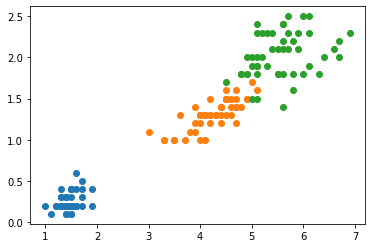

In [105]:
plt.scatter(df0['petal length (cm)'],df0['petal width (cm)'])
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'])
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'])

In [106]:
from sklearn.model_selection import train_test_split

In [107]:
df_new=df0.append([df1,df2],ignore_index=True)

In [108]:
df_new.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flowers_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [109]:
df_new.shape

(150, 6)

In [110]:
x=df_new.drop(['flowers_name','target'],axis='columns')
y=df_new['target']

In [127]:
x.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3
149,5.9,3.0,5.1,1.8


In [112]:
x.shape, y.shape

((150, 4), (150,))

In [121]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y,random_state=200)

In [122]:
x_train.shape, y_train.shape

((120, 4), (120,))

In [123]:
from sklearn.svm import SVC

In [124]:
model=SVC()


In [125]:
model.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [126]:
model.score(x_test,y_test)

1.0

In [129]:
model.predict([[6.5,3.0,5.2	,2.0]])

array([2])

In [130]:
from sklearn.model_selection import cross_val_score

In [132]:
cross_val_score(model,x_test,y_test)

array([1.        , 1.        , 1.        , 1.        , 0.66666667])

1. Regularization (C)

In [133]:
model_c=SVC(C=1)

In [138]:
model_c.fit(x_train,y_train)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [140]:
model_c.score(x_test,y_test)

1.0

In [144]:

model_C = SVC(C=30)
model_C.fit(x_train, y_train)
model_C.score(x_test, y_test)

1.0

In [146]:
model_g=SVC(gamma=10)
model_g.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=10, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [147]:
model_g.score(x_test,y_test)

0.8666666666666667


2. Kernel

In [148]:
model_klinear=SVC(kernel='linear')
model_klinear.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [149]:
model_klinear.score(x_test,y_test)

1.0